# ------------    Plotly and cufflinks    ------------

In [14]:
# import libraries
import numpy as np
import pandas as pd
import cufflinks as cf

# shows figures in ipynb
%matplotlib inline

# To remove 'warnings' use 'filterwarnings'
import warnings
warnings.filterwarnings('ignore')

# Enable offline mode for interactive plotting
cf.go_offline()

In [2]:
# check plotly version
import plotly
print(plotly.__version__)   # version > 1.9.4 required

5.24.1


___

## --------    Test Plotly    --------

In [1]:
# test plotly: Makes an "HTML" file
    # The HTML file will embed Plotly.js (so the HTML will be havier, > 4.5mb)
    # However, we can use 'cdn' to imbed Plotly.js, makes the HTML much light-weight
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.write_html('first_figure.html', auto_open=True)

In [ ]:
# plotly.offline, Standalone HTML:
    # Offline mode will save an HTML file locally and open it inside your web browser.

import plotly
print(plotly.__version__) # version > 1.9.4 required

from plotly.graph_objs import Scatter, Layout 

plotly.offline.plot({
    "data": [
        Scatter(x=[1, 2, 3, 4], y=[4, 1, 3, 7])
    ],
    "layout": Layout(
        title="hello world"
    )
})

___

## --------    Show pltly figures in jypyter nb    --------

#### Use plotly in ipynb: render through Plotly.js but not saved to notebook (not recomended)
    # ERR: Mime type rendering requires nbformat>=4.2.0 but it is not installed
    # pip install --upgrade nbformat

In [ ]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

#### another way to see it in notebook (not recomended)

In [ ]:
# use offline version
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [ ]:
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())
df.head()

In [ ]:
# show plotly in notebook
df.iplot(kind='scatter',x='A',y='B',mode='markers',size=10)

___

## --------    use 'cdn' or 'plotly-2.35.2.min.js in working directory'    --------
    # The HTML file's large size is primarily due to the embedded Plotly.js.
    # To reduce the size, we can use 'cdn' to load Plotly.js externally.
    # Alternatively, we can download "Plotly.js" to our working directory and reference it locally.

In [ ]:
# using 'cdn'
import plotly.io as pio
import plotly.express as px

fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
pio.write_html(fig, 'plot_cdn.html', include_plotlyjs='cdn')

### Best way

In [ ]:
# using local "Plotly.js"
import plotly.io as pio
import plotly.express as px

fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
pio.write_html(fig, 'plot_local_plotly_js.html', include_plotlyjs='.\plotly-2.35.2.min.js')

___

# ------------    plotly plots    ------------

#### Plotly functions to create different types of plots  
#### Example Plotly functions for various visualizations:  
    # 1. go.Scatter: For line plots, scatter plots  
    # 2. go.Bar: For bar plots  
    # 3. go.Pie: For pie charts  
    # 4. go.Box: For box plots  
    # 5. go.Histogram: For histograms  
    # 6. go.Heatmap: For heatmaps  
    # 7. go.Surface: For 3D surface plots  

    # You can explore and customize each plot by adding traces and updating layouts. 
    
    # Example:  
    import plotly.graph_objects as go

    # Line plot example
    fig = go.Figure(data=go.Scatter(x=["A", "B", "C"], y=[10, 20, 30]))
    fig.show()


#### Let's create 2 dataframes

In [32]:
# df1: normal distribution of 100 rows and 4 columns
df1 = pd.DataFrame(np.random.randn(100, 4), columns='A B C D'.split())
df1.head()

,A,B,C,D
0,1.870292,0.053810,0.316630,0.364273
1,-1.793755,0.908734,1.061952,1.672805
2,0.347812,-1.939429,0.814964,0.674009
3,0.052285,-0.589635,-0.933688,-0.070115
4,-0.313522,0.132820,1.586265,-0.677808


In [8]:
# df2: used categorical data, notice dictionary style
df2 = pd.DataFrame({'Category':['A', 'B', 'C'], 'val':[32, 43, 50]})
df2

,Category,val
0,A,32
1,B,43
2,C,50


### lets plot using malpotlib

<AxesSubplot:>

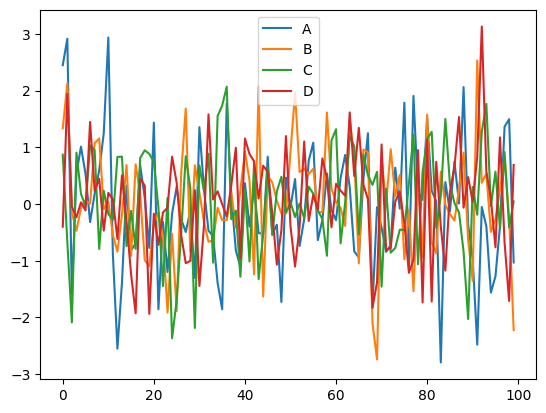

In [5]:
df1.plot()

## ----  Plot using Plotly & iplot  ----
#### we'll use this method, since it's much easier and aligned to pandas plot()

In [6]:
# plot using plotly
import plotly.io as pio
from plotly.offline import iplot

# Generate the plot
fig2 = df1.iplot(asFigure=True)
# The asFigure=True parameter is used in Cufflinks' iplot() function to ensure 
    # that it returns a Plotly Figure object instead of rendering the plot directly in the notebook.
    # Instead of rendering the plot, iplot() returns a Plotly Figure object.
    # This allows you to manipulate, save, or customize the figure further before displaying or exporting it.
# By Default When you call iplot() without asFigure=True, it immediately renders the plot in the notebook.

# Save the plot as an HTML file using a local Plotly.js file
pio.write_html(fig2, 'plotly_fig2.html', include_plotlyjs='./plotly-2.35.2.min.js')

#### lets see an alternative way to plot without using iplot()

In [ ]:
# alternative: plotly.offline.plot()
from plotly.offline import plot
import plotly.graph_objects as go

# Create a simple figure
fig3 = go.Figure(data=go.Scatter(x=df1.index, y=df1['A']))

# Save the plot as an HTML file
plot(fig3, filename='plotly_fig3.html', include_plotlyjs='./plotly-2.35.2.min.js', auto_open=True)

In [ ]:
# ALL COLUMNS: Create a line plot for all columns
fig4 = go.Figure()

for column in df1.columns:
    fig4.add_trace(go.Scatter(x=df1.index, y=df1[column], mode='lines+markers', name=column))

# Update layout
fig4.update_layout(
    title="Line Plot for All Columns",
    xaxis_title="Index",
    yaxis_title="Values",
    template="plotly_white"
)

In [ ]:
# Show the plot
fig4.show()

In [7]:
# Save the plot as an HTML file
plot(fig4, filename='plotly_fig4.html', include_plotlyjs='./plotly-2.35.2.min.js', auto_open=True)

'plotly_fig4.html'

### ----  Enable Hovermode on axis  ----
    # features: 
        # zoom-in: By marking selection-box (or use the buttnon)
        # zoom-out: double click (or use the buttnon)
        # capture as png
        # pan/move the whole plot
        # Hover on the plot
        # Hover on the X-axis
        # trun on/off a plot by 2x-clicking on legend

In [ ]:
import plotly.io as pio
from plotly.offline import iplot

# Generate the plot
fig5 = df1.iplot(asFigure=True, kind='line', title="Comparison Hover Example")
# By using kind='line', you're explicitly instructing Cufflinks to render the data as a line chart.
# For numeric data, it usually defaults to kind='line'.
# Custom Plot Types: You can specify other plot types using kind, such as 'bar', 'scatter', 'box', 'surface', etc.

# Update the layout to enable hover comparisons
fig5.update_layout(
    hovermode='x unified',  # Enable hover comparison
    xaxis_title="Index",
    yaxis_title="Values"
)

# Save the plot as an HTML file using a local Plotly.js file
pio.write_html(fig5, 'plotly_fig5.html', include_plotlyjs='./plotly-2.35.2.min.js')

___

# ------------    scatter, bar, box, ratio, heatmap and more    ------------
#### use 'kind' to set plot-type

### scatterplot, need x and y (we set those for column)

In [ ]:
# by default it'll connect the points by line, so we've used "mode=marker"
import plotly.io as pio
from plotly.offline import iplot

# Generate the plot
# fig6 = df1.iplot(asFigure=True, kind='scatter', x='A', y='B')
fig6 = df1.iplot(asFigure=True, kind='scatter', x='A', y='B', mode='markers')

# Save the plot as an HTML file using a local Plotly.js file
pio.write_html(fig6, 'plotly_fig6_2.html', include_plotlyjs='./plotly-2.35.2.min.js')

### Barplot : we now use a categorical DataFrame


In [7]:
fig7 = df2.iplot(asFigure=True, kind='bar', x='Category', y='val')
pio.write_html(fig7, 'plotly_fig7.html', include_plotlyjs='./plotly-2.35.2.min.js')

### Histogram

In [4]:
fig14 = df1['A'].iplot(asFigure=True, kind='hist', bins=50)
pio.write_html(fig14, 'plotly_fig14.html', include_plotlyjs='./plotly-2.35.2.min.js')

#### Using whole DataFrame results in overlapping histograms, but we can toggle them on/off.

In [5]:
fig15 = df1.iplot(asFigure=True, kind='hist', bins=50)
pio.write_html(fig15, 'plotly_fig15.html', include_plotlyjs='./plotly-2.35.2.min.js')

### When data is not conveniently placed, such as in df1,  
    # we need to use an aggregate function like count, mean/average, or groupby.  
    # Combining a "bar plot" with an aggregate function makes it more powerful.

In [4]:
import plotly.io as pio
from plotly.offline import iplot

In [11]:
# Without an aggregate function, df1 would result in a cluttered bar plot with meaningless bars.
fig8 = df1.iplot(asFigure=True, kind='bar')
pio.write_html(fig8, 'plotly_fig8.html', include_plotlyjs='./plotly-2.35.2.min.js')

In [12]:
# Using count as an aggregate function (counts occurrences in each column)
fig9 = df1.count().iplot(asFigure=True, kind='bar')
pio.write_html(fig9, 'plotly_fig9.html', include_plotlyjs='./plotly-2.35.2.min.js')
# Since each column has the same number of instances, the bars will be of equal height (i.e. 100).

In [13]:
# Using sum as an aggregate function
fig10 = df1.sum().iplot(asFigure=True, kind='bar')
pio.write_html(fig10, 'plotly_fig10.html', include_plotlyjs='./plotly-2.35.2.min.js')

### Boxplot
    # It automatically aggregates data to show distribution.
    # Columns can be toggled on/off by passing arguments or clicking on the plot.
    # Quartiles for each column are shown interactively.

In [5]:
fig11 = df1.iplot(asFigure=True, kind='box')
pio.write_html(fig11, 'plotly_fig11.html', include_plotlyjs='./plotly-2.35.2.min.js')

___

## ----  3D surfaceplot  ----
    # Activity: Rotate, zoom, interactive view

In [4]:
# First, create a DataFrame with 3 variables for a 3D plot.
# A 3D surface plot is generated from these three variables.
df3 = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [10, 20, 30, 20, 10], 'z': [500, 400, 300, 200, 100]})
fig12 = df3.iplot(asFigure=True, kind='surface')
pio.write_html(fig12, 'plotly_fig12.html', include_plotlyjs='./plotly-2.35.2.min.js')

In [5]:
# Changing color scale: rd (red), yl (yellow), bu (blue). 'rdylbu' matches Matplotlib colormaps.
# Check Plotly documentation for more color scale options.
df4 = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [10, 20, 30, 20, 10], 'z': [5, 4, 3, 2, 1]})
fig13 = df4.iplot(asFigure=True, kind='surface', colorscale='rdylbu')
pio.write_html(fig13, 'plotly_fig13.html', include_plotlyjs='./plotly-2.35.2.min.js')

___

## ----  spread  ----
    # This type of visualization is most commonly used for stock data, such as comparing stocks.
        # This involves plotting two columns as line plots and 
        # visualizing their spread against each other.
    # This is how we can observe the spread between two stocks.    
    # We'll explore this more in the "Financial Data Analysis project", 
        # where we'll see more technical analysis plots.

In [7]:
fig16 = df1[['A', 'B']].iplot(asFigure=True, kind='spread')
pio.write_html(fig16, 'plotly_fig16.html', include_plotlyjs='./plotly-2.35.2.min.js')

# notice double '[]'
# The double brackets [['A', 'B']] are used to select multiple columns from a DataFrame.

# Single brackets (['A']) return a Series
# Double brackets ([['A', 'B']]) return a DataFrame
# Since .iplot() expects a DataFrame when plotting 
    # multiple columns together (like in a spread plot), we need to use double brackets.

# if df1['A', 'B'] is used KeyError: ('A', 'B') is appear
# if df1['A'].iplot() is used iplot will throw an error 
    # because it cannot create a spread plot with just one column.

## ----  Bubble plot  ----
    # It's similar to a scatter plot, but the size of the points varies based on another variable. 

In [4]:
# Notice x='A', y='B' is the same as in a scatter plot,
    # but here, the size is based on column 'C' (size='C').

# This type of visualization is often used in reports,
    # such as comparing world GDP with population or happiness factors in UN reports.

fig17 = df1.iplot(asFigure=True, kind='bubble', x='A', y='B', size='C')
pio.write_html(fig17, 'plotly_fig17.html', include_plotlyjs='./plotly-2.35.2.min.js')

## ----  scatter_matrix  ----

array([[<AxesSubplot:xlabel='A', ylabel='A'>,
        <AxesSubplot:xlabel='B', ylabel='A'>,
        <AxesSubplot:xlabel='C', ylabel='A'>,
        <AxesSubplot:xlabel='D', ylabel='A'>],
       [<AxesSubplot:xlabel='A', ylabel='B'>,
        <AxesSubplot:xlabel='B', ylabel='B'>,
        <AxesSubplot:xlabel='C', ylabel='B'>,
        <AxesSubplot:xlabel='D', ylabel='B'>],
       [<AxesSubplot:xlabel='A', ylabel='C'>,
        <AxesSubplot:xlabel='B', ylabel='C'>,
        <AxesSubplot:xlabel='C', ylabel='C'>,
        <AxesSubplot:xlabel='D', ylabel='C'>],
       [<AxesSubplot:xlabel='A', ylabel='D'>,
        <AxesSubplot:xlabel='B', ylabel='D'>,
        <AxesSubplot:xlabel='C', ylabel='D'>,
        <AxesSubplot:xlabel='D', ylabel='D'>]], dtype=object)

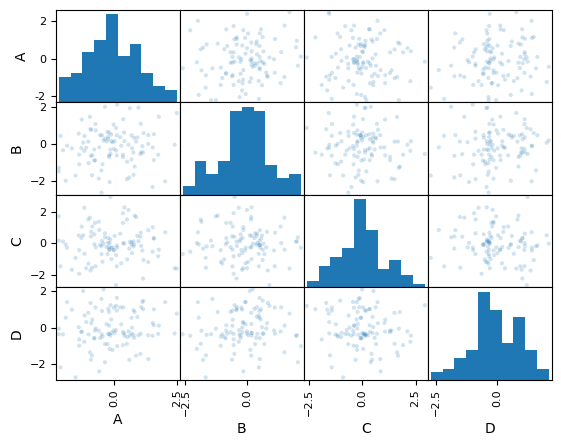

In [26]:
# scatter_matrix is very similar to sns pairplot.
# It creates a scatter matrix for all the columns that it can.
    # All columns need to be numerical for this to work.
    # It's interactive, and we can zoom in for each of the plots.
    # For large datasets, this may take more time to load.
# fig18 = df1.scatter_matrix()    # won't work, needed: pip install chart_studio
# static using pandas
pd.plotting.scatter_matrix(df1, alpha=0.2)

In [33]:
# instead we'll use "scatter_matrix" from plotly.express
import plotly.express as px
import plotly.io as pio

# Create scatter matrix plot
fig18 = px.scatter_matrix(df1)
pio.write_html(fig18, 'plotly_fig18.html', include_plotlyjs='./plotly-2.35.2.min.js')
